In [7]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

import random
random_seed = 1234
random.seed(random_seed)
np.random.seed(random_seed)

import Function as f

In [2]:
# def cmatrix_fun(model_name, actual, predicted):
#     # Compute confusion matrix
#     cm = metrics.confusion_matrix(actual, predicted)
    
#     # Normalize confusion matrix
#     cm_normalized = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100
    
#     # Plot the normalized confusion matrix
#     fig, ax = plt.subplots(figsize=(6, 6))
#     class_labels = ['normal', 'mild', 'moderate', 'severe']
#     im = ax.imshow(cm_normalized, interpolation='nearest', cmap='Blues')
    
#     # Add colorbar
#     cbar = ax.figure.colorbar(im, ax=ax)
#     cbar.ax.set_ylabel('Percentage', rotation=-90, va="bottom")
    
#     # Show all ticks and label them with the respective list entries
#     ax.set(xticks=np.arange(cm.shape[1]),
#            yticks=np.arange(cm.shape[0]),
#            xticklabels=class_labels, yticklabels=class_labels,
#            title=model_name,
#            ylabel='True label',
#            xlabel='Predicted label')
    
#     # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), ha="right",
#              rotation_mode="anchor")
    
#     # Loop over data dimensions and create text annotations.
#     fmt = '.2f'  # Format for the percentages
#     thresh = cm_normalized.max() / 2.
#     for i in range(cm.shape[0]):
#         for j in range(cm.shape[1]):
#             ax.text(j, i, format(cm_normalized[i, j], fmt),
#                     ha="center", va="center",
#                     color="white" if cm_normalized[i, j] > thresh else "black")
    
#     plt.show()

In [3]:
# def read_csv_file(file_path):
#     try:
#         return pd.read_csv(file_path, encoding='utf-8')
#     except UnicodeDecodeError:
#         return pd.read_csv(file_path, encoding='latin1')


# def correlation(dataset, threshold):
#     col_corr = set()  # Set of all the names of correlated columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
#                 colname = corr_matrix.columns[i]  # getting the name of column
#                 col_corr.add(colname)
#     return col_corr

# def Encoding(df):
#     # Create the ncoder variable
#     encoder = LabelEncoder()
#     cat_df = df.select_dtypes(include=['object'])
#     for i in cat_df:
#         # fit the categoral feature to the encoding method
#         df[i] = encoder.fit_transform(df[i]) 
#     return df

# def MissingValueHandling(merged_df):
#     null_col =  dict(merged_df.isnull().sum()) 
#     missing_data = []
#     for key, value in null_col.items():
#         if (value != 0):
#             missing_data.append(key) 
#     print("Missing Values Column:", null_col)
#     for i in missing_data:
#         fill_list = merged_df[i].dropna().tolist()
#         merged_df[i] = merged_df[i].fillna(pd.Series(np.random.choice(fill_list , size = len(merged_df.index))))
#     return merged_df
    
# # Function to train and evaluate models
# def train_and_evaluate(model, model_name, X_train_scaled, y_train, X_test_scaled, y_test):
#     model.fit(X_train_scaled, y_train)
#     train_accuracy = model.score(X_train_scaled, y_train) * 100
#     test_accuracy = model.score(X_test_scaled, y_test) * 100
#     # y_pred = model.predict(X_test_scaled)
#     # accuracy = accuracy_score(y_test, y_pred)
    
#     print(f"{model_name} Training Accuracy: {train_accuracy:.2f}")
#     print(f"{model_name} Testing Accuracy: {test_accuracy:.2f}")
#     # print(f"{model_name} Model Accuracy: {accuracy:.2f}")
    


# def evaluate_classification_model(model, X_test, y_test):
#     # Make predictions on the test set
#     y_pred = model.predict(X_test)

#     # Compute evaluation metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average='weighted')
#     recall = recall_score(y_test, y_pred, average='weighted')
#     f1 = f1_score(y_test, y_pred, average='weighted')
#     cm = confusion_matrix(y_test, y_pred)

#     # Print the evaluation metrics
#     print("Precision:", precision)
#     print("Recall:", recall)
#     print("F1-score:", f1)

#     # Plot the confusion matrix
#     labels = np.unique(y_test)
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predicted Label')
#     plt.ylabel('True Label')
#     plt.show()


## File Paths:

In [3]:
womac_path = "../csv/data_training/Aparameters_24.csv"
features_path = "../csv/data_training/AllFeatures.csv"

wdf = f.read_csv_file(womac_path)
fdf = f.read_csv_file(features_path)

fdf.columns = fdf.columns.str.strip()
wdf.columns = wdf.columns.str.strip()

assert 'patient_id' in fdf.columns, "'patient_id' not found in fdf columns"
assert 'patient_id' in wdf.columns, "'patient_id' not found in wdf columns"

fdf.head()
# wdf.head()

,patient_id,swing_time_max,swing_time_min,stance_time_max,stance_time_min,stride_time_max,stride_time_min,strike_angle,mean_hs_angle,mean_to_angle,...,powerY_ 3_C,powerY_ 4_C,powerY_ 5_C,powerY_ 6_C,powerZ_ 1_C,powerZ_ 2_C,powerZ_ 3_C,powerZ_ 4_C,powerZ_ 5_C,powerZ_ 6_C
0,1,1.04,0.46,1.18,0.81,1.99,1.31,24.491429,24.000000,38.840000,...,1040.211971,73.481629,141.905164,10.216969,1.571939e+06,607.747259,533.161447,2633.837158,3055.918834,173.842186
1,1,1.22,0.42,1.39,0.08,2.24,0.53,21.702500,21.227143,34.982857,...,1964.301772,816.673624,404.261715,228.916362,2.954191e+06,109.416956,2606.851615,10.729508,5185.243035,25.271313
2,1,1.01,0.42,1.01,0.23,2.02,0.65,18.201429,17.451667,32.843333,...,4199.071301,3488.940407,113.009892,760.522046,1.902485e+06,860.193745,304.164403,12119.034787,1532.932283,537.452090
3,10,0.90,0.43,0.85,0.52,1.61,1.00,12.638571,11.700000,27.365000,...,753.474303,535.838457,105.252777,182.907451,9.738762e+05,2350.306948,2954.338341,2614.545432,1978.834077,105.690189
4,10,0.61,0.36,0.86,0.34,1.43,0.95,16.573750,17.008571,28.935714,...,442.169719,431.027909,176.619568,75.768927,1.519685e+06,72.975955,462.167270,1289.025156,711.321877,26.048736


# Preprocessing:

## Merging two Dataframes

In [5]:
# Get the count of trials per patient
trials_counts = fdf['patient_id'].value_counts().to_dict()
print("trials:", trials_counts)
# Expand the anthropometric data
expanded_wdf = wdf.loc[
    wdf.index.repeat(wdf['patient_id'].map(trials_counts))
].reset_index(drop=True)
print("features df shape:", fdf.shape)
print("all df shape:", expanded_wdf.shape)

merged_df = pd.merge(fdf, wdf, on='patient_id', how='left')
merged_df.shape

trials: {11: 5, 17: 4, 18: 4, 23: 4, 22: 4, 21: 4, 20: 4, 7: 4, 8: 4, 6: 4, 16: 4, 15: 4, 14: 4, 13: 4, 12: 4, 5: 3, 1: 3, 2: 3, 3: 3, 10: 3, 19: 3, 9: 3, 4: 2}
features df shape: (84, 56)
all df shape: (84, 8)


(84, 63)

In [9]:
def MergeTwoDataFrame(df1, df2, col_name):
    # Get the count of trials per patient
    trials_counts = df1[col_name].value_counts().to_dict()
    # print("trials:", trials_counts)
    # Expand the anthropometric data
    expanded_wdf = df2.loc[
        df2.index.repeat(df2[col_name].map(trials_counts))
    ].reset_index(drop=True)
    merged_df = pd.merge(df1, df2, on = col_name, how = 'left')
    if (fdf.shape[0] == merged_df.shape[0]):
        print("Merged succesfully")
    return merged_df

In [10]:
merged_df = f.MergeTwoDataFrame(fdf, wdf, "patient_id")
merged_df.head()

Merged succesfully


,patient_id,swing_time_max,swing_time_min,stance_time_max,stance_time_min,stride_time_max,stride_time_min,strike_angle,mean_hs_angle,mean_to_angle,...,powerZ_ 4_C,powerZ_ 5_C,powerZ_ 6_C,name,gender,leg,age,BMI,total_score,severity
0,1,1.04,0.46,1.18,0.81,1.99,1.31,24.491429,24.000000,38.840000,...,2633.837158,3055.918834,173.842186,marwa abdelaly,f,right,40.0,35.755956,33,mild
1,1,1.22,0.42,1.39,0.08,2.24,0.53,21.702500,21.227143,34.982857,...,10.729508,5185.243035,25.271313,marwa abdelaly,f,right,40.0,35.755956,33,mild
2,1,1.01,0.42,1.01,0.23,2.02,0.65,18.201429,17.451667,32.843333,...,12119.034787,1532.932283,537.452090,marwa abdelaly,f,right,40.0,35.755956,33,mild
3,10,0.90,0.43,0.85,0.52,1.61,1.00,12.638571,11.700000,27.365000,...,2614.545432,1978.834077,105.690189,rehab helmy,m,right,35.0,29.136316,22,normal
4,10,0.61,0.36,0.86,0.34,1.43,0.95,16.573750,17.008571,28.935714,...,1289.025156,711.321877,26.048736,rehab helmy,m,right,35.0,29.136316,22,normal


## Missing Data Handling

In [21]:
merged_df = f.MissingValueHandling(merged_df)

the columns that contain null values: []
Missing values handled


## Encoding Categorical Data:

In [7]:
merged_df = f.Encoding(merged_df)
    
# Check that the value transformed successfully 
print('Severity after Encoding:')
dict(merged_df['severity'].value_counts())

Severity before Encoding:
{'normal': 33, 'severe': 21, 'mild': 16, 'moderate': 14}
Severity after Encoding:


{2: 33, 3: 21, 0: 16, 1: 14}

## Drop Extra Columns and splitting data from target

In [23]:
merged_df = shuffle(merged_df, random_state = random_seed)

columns_to_drop = ['patient_id', 'total_score', 'name', 'leg', 'severity']

X = merged_df.drop(columns = columns_to_drop, axis = 1)  
y = merged_df['severity']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
X_train.shape

(67, 58)

# Feature Selection

## Filter Method

In [24]:
def PlottingfeatureImportance(features, score, x_label, y_label, title):
    # Plot feature importance
    plt.figure(figsize=(12, 12))
    plt.barh(features, score, color='teal')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.gca().invert_yaxis()  # To display the highest scores at the top
    # Save the plot as an image
    # plt.savefig('important_img/Gain_feature_importance.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

In [26]:
a, b = 4, 7
print(a,b)

4 7


In [25]:
###################################################### Information Gain ######################################################
mi_scores = mutual_info_classif(X, y)
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
# Sort features by their mutual information scores
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)
# mi_scores_df

f.PlottingfeatureImportance(mi_scores_df['Feature'], mi_scores_df['MI Score'], 'Mutual Information Score', 'Feature', 'Feature Importance using Mutual Information')

ValueError: could not convert string to float: 'f'

In [ ]:
# def DropAfterFeatureSelection(mi_scores_df, X_train, X_test):
#     non_selected_features = []
#     for i in range(len(mi_scores_df["Feature"])):
#         # print(mi_scores_df["Feature"][i])
#         if mi_scores_df["MI Score"][i] == 0.000000:
#             non_selected_features.append(mi_scores_df["Feature"][i])
#     print("the droped columns", non_selected_features)
#     X_train = X_train.drop(non_selected_features, axis=1)
#     X_test = X_test.drop(non_selected_features, axis=1)
#     return X_train, X_test

In [11]:
# non_selected_features = []
# for i in range(len(mi_scores_df["Feature"])):
#     # print(mi_scores_df["Feature"][i])
#     if mi_scores_df["MI Score"][i] == 0.000000:
#         non_selected_features.append(mi_scores_df["Feature"][i])

# non_selected_features

['stance_time_min',
 'powerX_ 4_T',
 'powerX_ 6_T',
 'powerY_ 3_T',
 'powerZ_ 5_T',
 'powerZ_ 6_T',
 'powerX_ 2_C',
 'powerX_ 4_C',
 'powerX_ 6_C',
 'powerY_ 2_T.1',
 'powerY_ 5_C',
 'powerY_ 6_C',
 'powerZ_ 4_C']

### Drop unselected columns from filter method

In [12]:
X_train_filter, X_test_filter = f.DropAfterFeatureSelection(mi_scores_df, X_train, X_test)
# X_test_filter = X_test.drop(non_selected_features, axis=1)
X_train_filter.columns

Index(['swing_time_max', 'swing_time_min', 'stance_time_max',
       'stride_time_max', 'stride_time_min', 'strike_angle', 'mean_hs_angle',
       'mean_to_angle', 'thrustACCel_C', 'thrustACCel_T', 'max_stance_angles',
       'max_swing_angles', 'Omega_X_T', 'Omega_Y_T', 'Omega_Z_T',
       'powerX_ 1_T', 'powerX_ 2_T', 'powerX_ 3_T', 'powerX_ 5_T',
       'powerY_ 1_T', 'powerY_ 2_T', 'powerY_ 4_T', 'powerY_ 5_T',
       'powerY_ 6_T', 'powerZ_ 1_T', 'powerZ_ 2_T', 'powerZ_ 3_T',
       'powerZ_ 4_T', 'Omega_X_C', 'Omega_Y_C', 'Omega_Z_C', 'powerX_ 1_C',
       'powerX_ 3_C', 'powerX_ 5_C', 'powerY_ 1_C', 'powerY_ 3_C',
       'powerY_ 4_C', 'powerZ_ 1_C', 'powerZ_ 2_C', 'powerZ_ 3_C',
       'powerZ_ 5_C', 'powerZ_ 6_C', 'gender', 'age', 'BMI'],
      dtype='object')

# Scaling Data

In [13]:
scaler_filter = StandardScaler()
X_train_filter = scaler_filter.fit_transform(X_train_filter)
X_test_filter = scaler_filter.transform(X_test_filter)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

## All Features

In [15]:
models_all = {
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Logistic Regression": LogisticRegression(),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(),
    "linear SVM": SVC(kernel='linear', random_state=random_seed),
    "Poly SVM": SVC(kernel='poly', random_state=random_seed),
    "rbf SVM": SVC(kernel='rbf', random_state=random_seed),
    "Sigmoid SVM": SVC(kernel= 'sigmoid', random_state=random_seed),
    "Lasso Logistic Regression": LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=10000, random_state=random_seed)
}

# Train and evaluate each model
for model_name, model in models_all.items():
    train_and_evaluate(model, model_name, X_train, y_train, X_test, y_test)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1 Score ({model_name}): {f1:.4f}")
    print('-' * 50)


Random Forest Training Accuracy: 100.00
Random Forest Testing Accuracy: 70.59
F1 Score (Random Forest): 0.6603
--------------------------------------------------
Logistic Regression Training Accuracy: 100.00
Logistic Regression Testing Accuracy: 88.24
F1 Score (Logistic Regression): 0.8738
--------------------------------------------------
KNN (k=7) Training Accuracy: 68.66
KNN (k=7) Testing Accuracy: 76.47
F1 Score (KNN (k=7)): 0.7647
--------------------------------------------------
XGBoost Training Accuracy: 100.00
XGBoost Testing Accuracy: 82.35
F1 Score (XGBoost): 0.8206
--------------------------------------------------
linear SVM Training Accuracy: 100.00
linear SVM Testing Accuracy: 76.47
F1 Score (linear SVM): 0.7810
--------------------------------------------------
Poly SVM Training Accuracy: 62.69
Poly SVM Testing Accuracy: 41.18
F1 Score (Poly SVM): 0.2506
--------------------------------------------------
rbf SVM Training Accuracy: 89.55
rbf SVM Testing Accuracy: 58.82
F

In [16]:
# clf_all =  RandomForestClassifier(random_state=random_seed)
# clf_all.fit(X_train, y_train)

# y_pred_all_features = clf_all.predict(X_test)

# cmatrix_fun("Rf with ALL features", y_test, y_pred_all_features)

## Over Sampling

In [28]:
from imblearn.over_sampling  import RandomOverSampler
sampling_strategy = {
    0: 2500,
    1: 2500,
    2: 2500,
    3: 2500
    # Add more classes as needed
}

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Initialize RandomOverSampler with the specified sampling strategy
smoteOver = RandomOverSampler(sampling_strategy=sampling_strategy)
# smoteOver = RandomOverSampler(sampling_strategy=1)
X_smoteOver, y_smoteOver = smoteOver.fit_resample(X_train , y_train)
print(f' X_shape: {X_smoteOver.shape} \n y_shape: {y_smoteOver.shape}')

# Initialize StandardScaler
# scaler_corr = StandardScaler()
# X_train_smote = scaler_corr.fit_transform(X_smoteOver)
# X_test_smote = scaler_corr.transform(X_test)



 X_shape: (10000, 58) 
 y_shape: (10000,)


In [29]:
models_sample = {
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Logistic Regression": LogisticRegression(),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(),
    "linear SVM": SVC(kernel='linear', random_state=random_seed),
    "Poly SVM": SVC(kernel='poly', random_state=random_seed),
    "rbf SVM": SVC(kernel='rbf', random_state=random_seed),
    "Sigmoid SVM": SVC(kernel= 'sigmoid', random_state=random_seed),
    "Lasso Logistic Regression": LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=10000, random_state=random_seed)
}

# Train and evaluate each model
for model_name, model in models_sample.items():
    train_and_evaluate(model, model_name, X_smoteOver, y_smoteOver, X_test, y_test)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1 Score ({model_name}): {f1:.4f}")
    print('-' * 50)

Random Forest Training Accuracy: 100.00
Random Forest Testing Accuracy: 82.35
F1 Score (Random Forest): 0.8013
--------------------------------------------------
Logistic Regression Training Accuracy: 100.00
Logistic Regression Testing Accuracy: 82.35
F1 Score (Logistic Regression): 0.8189
--------------------------------------------------
KNN (k=7) Training Accuracy: 100.00
KNN (k=7) Testing Accuracy: 58.82
F1 Score (KNN (k=7)): 0.6232
--------------------------------------------------
XGBoost Training Accuracy: 100.00
XGBoost Testing Accuracy: 94.12
F1 Score (XGBoost): 0.9448
--------------------------------------------------
linear SVM Training Accuracy: 100.00
linear SVM Testing Accuracy: 76.47
F1 Score (linear SVM): 0.7810
--------------------------------------------------
Poly SVM Training Accuracy: 100.00
Poly SVM Testing Accuracy: 70.59
F1 Score (Poly SVM): 0.6975
--------------------------------------------------
rbf SVM Training Accuracy: 100.00
rbf SVM Testing Accuracy: 88.2

In [19]:
# clf_all =  RandomForestClassifier(random_state=random_seed)
# clf_all.fit(X_smoteOver, y_smoteOver)

# y_pred_sample = clf_all.predict(X_test)

# cmatrix_fun("Rf with ALL features", y_test, y_pred_sample)

## Feature selection training

In [20]:
models_filter = {
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Logistic Regression": LogisticRegression(),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=7),
    "XGBoost": XGBClassifier(),
    "linear SVM": SVC(kernel='linear', random_state=random_seed),
    "Poly SVM": SVC(kernel='poly', random_state=random_seed),
    "rbf SVM": SVC(kernel='rbf', random_state=random_seed),
    "Sigmoid SVM": SVC(kernel= 'sigmoid', random_state=random_seed),
    "Lasso Logistic Regression": LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=10000, random_state=random_seed)
}

# Train and evaluate each model
for model_name, model in models_filter.items():
    train_and_evaluate(model, model_name, X_train_filter, y_train, X_test_filter, y_test)
    y_pred = model.predict(X_test_filter)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1 Score ({model_name}): {f1:.4f}")
    print('-' * 50)
    

Random Forest Training Accuracy: 100.00
Random Forest Testing Accuracy: 76.47
F1 Score (Random Forest): 0.7425
--------------------------------------------------
Logistic Regression Training Accuracy: 100.00
Logistic Regression Testing Accuracy: 76.47
F1 Score (Logistic Regression): 0.7696
--------------------------------------------------
KNN (k=7) Training Accuracy: 55.22
KNN (k=7) Testing Accuracy: 47.06
F1 Score (KNN (k=7)): 0.4958
--------------------------------------------------
XGBoost Training Accuracy: 100.00
XGBoost Testing Accuracy: 94.12
F1 Score (XGBoost): 0.9399
--------------------------------------------------
linear SVM Training Accuracy: 100.00
linear SVM Testing Accuracy: 64.71
F1 Score (linear SVM): 0.6645
--------------------------------------------------
Poly SVM Training Accuracy: 77.61
Poly SVM Testing Accuracy: 52.94
F1 Score (Poly SVM): 0.4216
--------------------------------------------------
rbf SVM Training Accuracy: 94.03
rbf SVM Testing Accuracy: 52.94
F

In [21]:
# clf_filter =  RandomForestClassifier(random_state=random_seed)
# clf_filter.fit(X_train_filter, y_train)

# y_pred_filter = clf_filter.predict(X_test_filter)

# cmatrix_fun("Rf with ALL features", y_test, y_pred_filter)

## PCA selection

In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA


selector = RandomForestClassifier(n_estimators=100)
selector.fit(X_train, y_train)  
model_pca = SelectFromModel(selector, prefit=True)
data_selected = model_pca.transform(X_train)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(data_selected)

x1 = model_pca.transform(X_test)
X_test_pca = pca.transform(x1)

In [23]:
models_pca = {
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Logistic Regression": LogisticRegression(),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(),
    "linear SVM": SVC(kernel='linear', random_state=random_seed),
    "Poly SVM": SVC(kernel='poly', random_state=random_seed),
    "rbf SVM": SVC(kernel='rbf', random_state=random_seed),
    "Sigmoid SVM": SVC(kernel= 'sigmoid', random_state=random_seed),
    "Lasso Logistic Regression": LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=10000, random_state=random_seed)
}

# Train and evaluate each model
for model_name, model in models_pca.items():
    train_and_evaluate(model, model_name, X_train_pca, y_train, X_test_pca, y_test)
    y_pred = model.predict(X_test_pca)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1 Score ({model_name}): {f1:.4f}")
    print('-' * 50)

Random Forest Training Accuracy: 100.00
Random Forest Testing Accuracy: 35.29
F1 Score (Random Forest): 0.3107
--------------------------------------------------
Logistic Regression Training Accuracy: 74.63
Logistic Regression Testing Accuracy: 70.59
F1 Score (Logistic Regression): 0.6965
--------------------------------------------------
KNN (k=7) Training Accuracy: 74.63
KNN (k=7) Testing Accuracy: 52.94
F1 Score (KNN (k=7)): 0.5094
--------------------------------------------------
XGBoost Training Accuracy: 100.00
XGBoost Testing Accuracy: 52.94
F1 Score (XGBoost): 0.5020
--------------------------------------------------
linear SVM Training Accuracy: 85.07
linear SVM Testing Accuracy: 64.71
F1 Score (linear SVM): 0.6510
--------------------------------------------------
Poly SVM Training Accuracy: 61.19
Poly SVM Testing Accuracy: 64.71
F1 Score (Poly SVM): 0.6059
--------------------------------------------------
rbf SVM Training Accuracy: 83.58
rbf SVM Testing Accuracy: 47.06
F1 

In [24]:
# clf_pca =  RandomForestClassifier(random_state=random_seed)
# clf_pca.fit(X_train_pca, y_train)

# y_pred_pca = clf_filter.predict(X_test_pca)

# cmatrix_fun("Rf with ALL features", y_test, y_pred_pca)

## PCA on original data

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components= 30)  # Example: Retain 10 principal components
X_pca = pca.fit_transform(X_scaled)

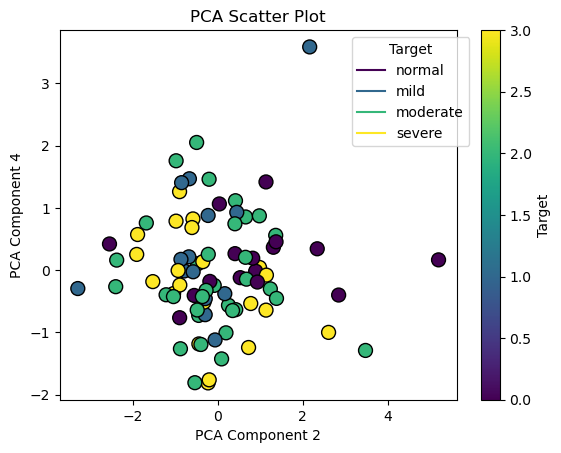

<Figure size 2000x2000 with 0 Axes>

In [26]:
scatter = plt.scatter(X_pca[:, 10], X_pca[:, 18], c=y, cmap='viridis', edgecolor='k', s=100)

# Create a legend with a color for each unique value in y
handles = [plt.Line2D([0,0],[0,0],color=scatter.cmap(scatter.norm(label))) for label in np.unique(y)]
class_labels = ['normal', 'mild', 'moderate', 'severe']
plt.legend(handles, class_labels, title='Target', bbox_to_anchor=(1.05, 1))

# Set plot title and axis labels
plt.title('PCA Scatter Plot')
plt.xlabel('PCA Component 2')
plt.ylabel('PCA Component 4')

# Add a colorbar with a label
cbar = plt.colorbar(scatter)
cbar.set_label('Target')

# Adjust figure size and layout
plt.figure(figsize=(20, 20))
plt.tight_layout()
plt.savefig('important_img/pca.png', format='png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


In [27]:
X_train_pca2, X_test_pca2, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=random_seed)

models_pca2 = {
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Logistic Regression": LogisticRegression(),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=7),
    "XGBoost": XGBClassifier(),
    "linear SVM": SVC(kernel='linear', random_state=random_seed),
    "Poly SVM": SVC(kernel='poly', random_state=random_seed),
    "rbf SVM": SVC(kernel='rbf', random_state=random_seed),
    "Sigmoid SVM": SVC(kernel= 'sigmoid', random_state=random_seed),
    "Lasso Logistic Regression": LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=10000, random_state=random_seed)
}

for model_name, model in models_pca2.items():
    train_and_evaluate(model, model_name, X_train_pca2, y_train, X_test_pca2, y_test)
    y_pred = model.predict(X_test_pca2)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1 Score ({model_name}): {f1:.4f}")
    print('-' * 50)

Random Forest Training Accuracy: 100.00
Random Forest Testing Accuracy: 64.71
F1 Score (Random Forest): 0.6153
--------------------------------------------------
Logistic Regression Training Accuracy: 98.51
Logistic Regression Testing Accuracy: 76.47
F1 Score (Logistic Regression): 0.7429
--------------------------------------------------
KNN (k=7) Training Accuracy: 61.19
KNN (k=7) Testing Accuracy: 58.82
F1 Score (KNN (k=7)): 0.5677
--------------------------------------------------
XGBoost Training Accuracy: 100.00
XGBoost Testing Accuracy: 76.47
F1 Score (XGBoost): 0.7500
--------------------------------------------------
linear SVM Training Accuracy: 98.51
linear SVM Testing Accuracy: 76.47
F1 Score (linear SVM): 0.7810
--------------------------------------------------
Poly SVM Training Accuracy: 61.19
Poly SVM Testing Accuracy: 41.18
F1 Score (Poly SVM): 0.2506
--------------------------------------------------
rbf SVM Training Accuracy: 88.06
rbf SVM Testing Accuracy: 58.82
F1 

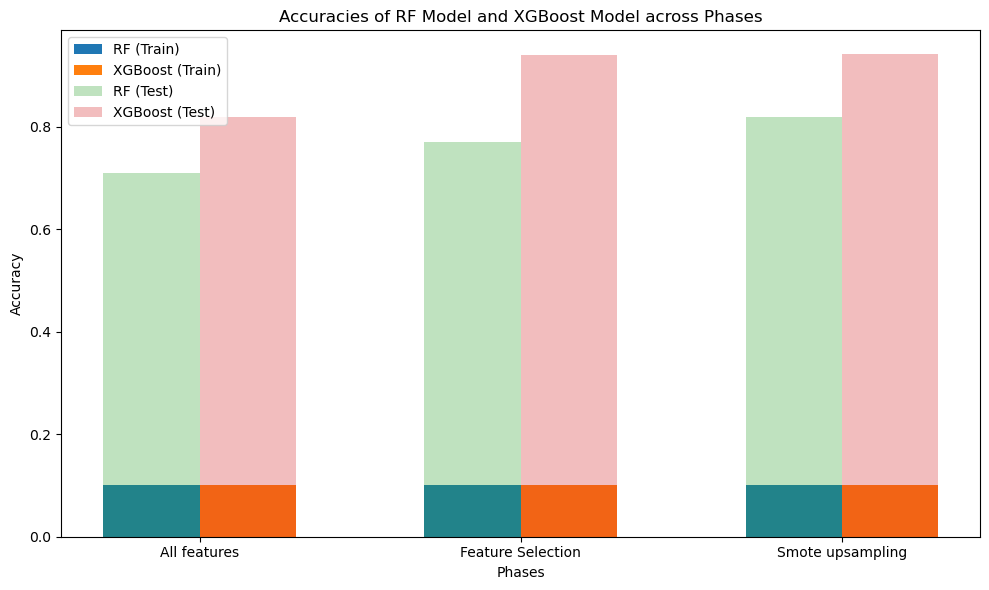

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
model1_train_acc =  [0.1, 0.1, 0.1]  # Training phase accuracies for model 1
# model1_val_acc = [0.78, 0.82, 0.80]    # Validation phase accuracies for model 1
model1_test_acc = [0.71, 0.77, 0.82]   # Test phase accuracies for model 1

model2_train_acc = [0.1, 0.1, 0.1]  # Training phase accuracies for model 2
# model2_val_acc = [0.72, 0.76, 0.74]    # Validation phase accuracies for model 2
model2_test_acc =    [0.82, 0.94, 0.9412]  # Test phase accuracies for model 2

phases = ['All features', 'Feature Selection', 'Smote upsampling']
bar_width = 0.3
index = np.arange(len(phases))

# Plotting training accuracies
plt.figure(figsize=(10, 6))
plt.bar(index - bar_width/2, model1_train_acc, bar_width, label='RF (Train)')
plt.bar(index + bar_width/2, model2_train_acc, bar_width, label='XGBoost (Train)')

# # Plotting validation accuracies
# plt.bar(index - bar_width/2, model1_val_acc, bar_width, label='Model 1 (Validation)', alpha=0.5)
# plt.bar(index + bar_width/2, model2_val_acc, bar_width, label='Model 2 (Validation)', alpha=0.5)

# Plotting test accuracies
plt.bar(index - bar_width/2, model1_test_acc, bar_width, label='RF (Test)', alpha=0.3)
plt.bar(index + bar_width/2, model2_test_acc, bar_width, label='XGBoost (Test)', alpha=0.3)

plt.xlabel('Phases')
plt.ylabel('Accuracy')
plt.title('Accuracies of RF Model and XGBoost Model across Phases')
plt.xticks(index, phases)
plt.legend()
plt.tight_layout()

plt.show()


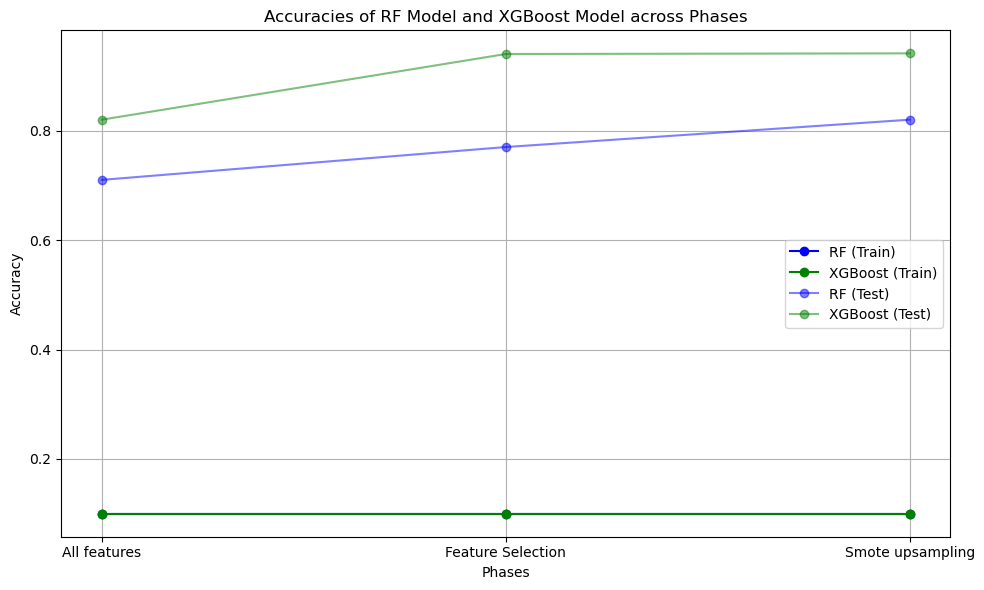

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
model1_train_acc = [0.1, 0.1, 0.1]   # Training phase accuracies for model 1
model1_test_acc = [0.71, 0.77, 0.82]  # Test phase accuracies for model 1

model2_train_acc = [0.1, 0.1, 0.1]    # Training phase accuracies for model 2
model2_test_acc = [0.82, 0.94, 0.9412] # Test phase accuracies for model 2

phases = ['All features', 'Feature Selection', 'Smote upsampling']
index = np.arange(len(phases))

# Plotting training accuracies as curves
plt.figure(figsize=(10, 6))
plt.plot(index, model1_train_acc, marker='o', linestyle='-', color='b', label='RF (Train)')
plt.plot(index, model2_train_acc, marker='o', linestyle='-', color='g', label='XGBoost (Train)')

# Plotting test accuracies as curves
plt.plot(index, model1_test_acc, marker='o', linestyle='-', color='b', alpha=0.5, label='RF (Test)')
plt.plot(index, model2_test_acc, marker='o', linestyle='-', color='g', alpha=0.5, label='XGBoost (Test)')

plt.xlabel('Phases')
plt.ylabel('Accuracy')
plt.title('Accuracies of RF Model and XGBoost Model across Phases')
plt.xticks(index, phases)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


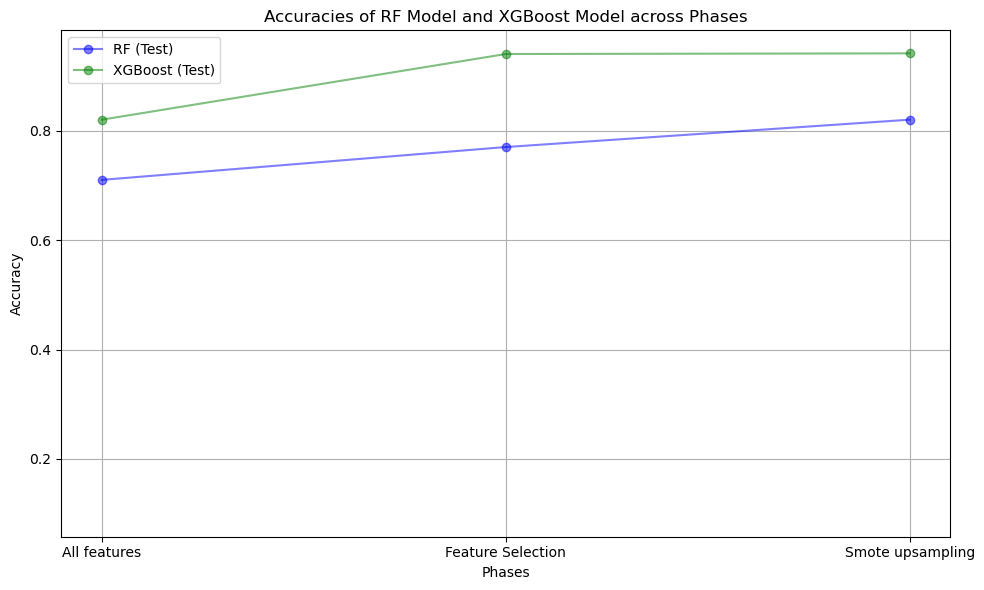

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
# model1_train_acc = [0.1, 0.1, 0.1]   # Training phase accuracies for model 1
model1_test_acc = [0.71, 0.77, 0.82]  # Test phase accuracies for model 1

model2_train_acc = [0.1, 0.1, 0.1]    # Training phase accuracies for model 2
# model2_test_acc = [0.82, 0.94, 0.9412] # Test phase accuracies for model 2

phases = ['All features', 'Feature Selection', 'Smote upsampling']
index = np.arange(len(phases))

# Calculate differences between accuracies
train_diff = np.abs(np.array(model1_train_acc) - np.array(model2_train_acc))
test_diff = np.abs(np.array(model1_test_acc) - np.array(model2_test_acc))

# Plotting training accuracies as curves with differences
plt.figure(figsize=(10, 6))

# Plotting training accuracies
# plt.plot(index, model1_train_acc, marker='o', linestyle='-', color='b', label='RF (Train)')
# plt.plot(index, model2_train_acc, marker='o', linestyle='-', color='g', label='XGBoost (Train)')

# Highlighting differences with filled area plot
plt.fill_between(index, model1_train_acc, model2_train_acc,  alpha=0.1)

# Plotting test accuracies as curves with differences
plt.plot(index, model1_test_acc, marker='o', linestyle='-', color='b', alpha=0.5, label='RF (Test)')
plt.plot(index, model2_test_acc, marker='o', linestyle='-', color='g', alpha=0.5, label='XGBoost (Test)')

# Highlighting differences with filled area plot
# plt.fill_between(index, model1_test_acc, model2_test_acc, color='gray', alpha=0.1)

plt.xlabel('Phases')
plt.ylabel('Accuracy')
plt.title('Accuracies of RF Model and XGBoost Model across Phases')
plt.xticks(index, phases)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
